In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

# Load data

In [2]:
data_directory = "../../Downloads/ml-latest/"
movieFile = "movies.csv"
ratingFile = "ratings.csv"

In [3]:
df_rating = pd.read_csv(data_directory + ratingFile, dtype = {'timestamp': 'Int64'})
df_movie = pd.read_csv(data_directory + movieFile)

In [4]:
df_rating.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [5]:
df_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Features we're interested in

## Basic info

In [9]:
print(f"Number of raters: %d" % (len(np.unique(df_rating['userId']))))
print("Number of movies: %d" % (len(df_movie)))
print("Number of ratings: %d" % (len(df_rating)))

Number of raters: 283228
Number of movies: 58098
Number of ratings: 27753444


## How many ratings does a movie have?

In [13]:
movieIds = np.unique(df_rating['movieId'])
numRatingsPerMovie = [len(df_rating[df_rating['movieId'] == movieId]) for movieId in movieIds]

mean number of ratings per movie: 515
median number of ratings per movie: 7


(array([5.0065e+04, 1.3370e+03, 6.0300e+02, 3.4300e+02, 2.6400e+02,
        1.8400e+02, 1.3900e+02, 1.2300e+02, 8.7000e+01, 1.0100e+02,
        7.5000e+01, 5.9000e+01, 6.3000e+01, 5.4000e+01, 3.7000e+01,
        3.6000e+01, 3.1000e+01, 2.5000e+01, 2.5000e+01, 0.0000e+00,
        2.0100e+02, 3.0000e+01, 7.0000e+00]),
 array([     0.        ,   1052.63157895,   2105.26315789,   3157.89473684,
          4210.52631579,   5263.15789474,   6315.78947368,   7368.42105263,
          8421.05263158,   9473.68421053,  10526.31578947,  11578.94736842,
         12631.57894737,  13684.21052632,  14736.84210526,  15789.47368421,
         16842.10526316,  17894.73684211,  18947.36842105,  20000.        ,
         20000.        ,  46666.66666667,  73333.33333333, 100000.        ]),
 <a list of 23 Patch objects>)

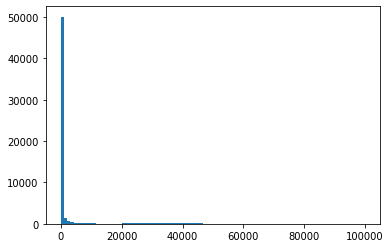

In [18]:
print("mean number of ratings per movie: %d" % (np.mean(numRatingsPerMovie)))
print("median number of ratings per movie: %d" % (np.median(numRatingsPerMovie)))
bins = list(np.linspace(0, 20000, 20)) + list(np.linspace(20000, 100000, 4))
plt.hist(numRatingsPerMovie, bins = bins)

In [92]:
print(np.max(numRatingsPerMovie))

97999


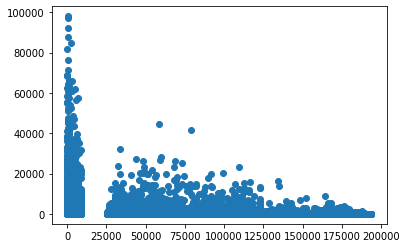

In [19]:
plt.scatter(movieIds, numRatingsPerMovie)

In [29]:
for threshold in [10, 30, 100, 500]:
    print(f"%d has fewer than {threshold} ratings" % len([i for i in numRatingsPerMovie if i < threshold]))

30173 has fewer than 10 ratings
37922 has fewer than 30 ratings
43389 has fewer than 100 ratings
48339 has fewer than 500 ratings


In [25]:
movieWithLessThan10Ratings = [movieIds[i] for i in range(len(movieIds)) if numRatingsPerMovie[i] < 10]

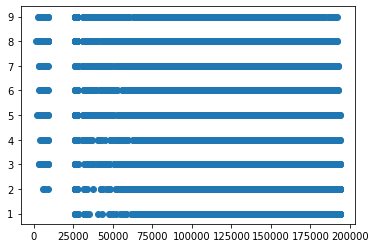

In [27]:
plt.scatter(movieWithLessThan10Ratings, [i for i in numRatingsPerMovie if i < 10])

## How many ratings does a rater provide?

In [30]:
allRaters = np.unique(df_rating['userId'])

In [32]:
ratingsPerRater = {rater: [] for rater in allRaters}
for i in range(len(df_rating)):
    row = df_rating.iloc[i]
    ratingsPerRater[row['userId']].append(row['rating'])

In [33]:
numRatingsPerRater = [len(ratingsPerRater[rater]) for rater in allRaters]

mean number of ratings per rater: 97
median number of ratings per rater: 30


(array([2.18958e+05, 3.11970e+04, 1.29270e+04, 6.81900e+03, 3.97500e+03,
        2.55900e+03, 1.66700e+03, 1.22800e+03, 8.20000e+02, 6.50000e+02,
        5.22000e+02, 3.95000e+02, 3.08000e+02, 2.39000e+02, 1.69000e+02,
        1.24000e+02, 1.10000e+02, 6.50000e+01, 7.30000e+01]),
 array([   0.        ,  105.26315789,  210.52631579,  315.78947368,
         421.05263158,  526.31578947,  631.57894737,  736.84210526,
         842.10526316,  947.36842105, 1052.63157895, 1157.89473684,
        1263.15789474, 1368.42105263, 1473.68421053, 1578.94736842,
        1684.21052632, 1789.47368421, 1894.73684211, 2000.        ]),
 <a list of 19 Patch objects>)

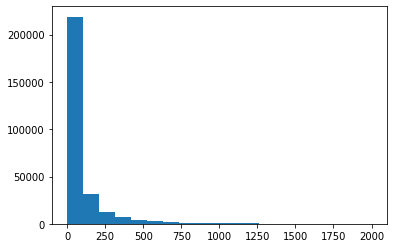

In [37]:
print("mean number of ratings per rater: %d" % (np.mean(numRatingsPerRater)))
print("median number of ratings per rater: %d" % (np.median(numRatingsPerRater)))
bins = list(np.linspace(0, 2000, 20))
plt.hist(numRatingsPerRater, bins = bins)

## Are raters 'harsh' or 'nice'?

In [38]:
meanRatingPerRater = [np.mean(ratingsPerRater[rater]) for rater in allRaters]

mean of mean rating per rater: 3
median of mean rating per rater: 3


Text(0.5, 1.0, 'distribution of mean rating for a user')

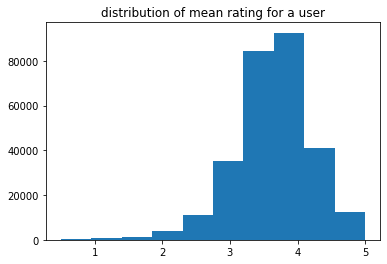

In [42]:
print("mean of mean rating per rater: %d" % (np.mean(meanRatingPerRater)))
print("median of mean rating per rater: %d" % (np.median(meanRatingPerRater)))
plt.hist(meanRatingPerRater)
plt.title("distribution of mean rating for a user")

## Are raters 'conservative' or 'liberal'?

In [43]:
scaleOfRatingPerRater = [np.max(ratingsPerRater[rater]) - np.min(ratingsPerRater[rater]) for rater in allRaters]

mean of rating scale per rater: 3
median of rating scale per rater: 3


Text(0.5, 1.0, 'distribution of rating scale for a user')

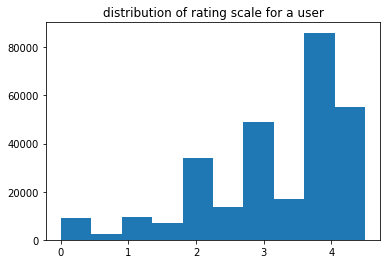

In [44]:
print("mean of rating scale per rater: %d" % (np.mean(scaleOfRatingPerRater)))
print("median of rating scale per rater: %d" % (np.median(scaleOfRatingPerRater)))
plt.hist(scaleOfRatingPerRater)
plt.title("distribution of rating scale for a user")

## Gaussian Normalization or Decoupling Normalization?

### How does Decoupling Normalization work?
### Suppose a rater R gives an Item a rating of r
### prob(R favor Item) = percentage(rating < r) + percentage(rating = r) / 2
### It's basically how many items that he/she rated are rated lower than r. It actually uses order of ratings to replace ratings.

In [68]:
POSSIBLE_RATINGS = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
def getProb(ratings, r):
    p1 = np.sum([rating < r for rating in ratings]) / len(ratings)
    p2 = np.sum([rating == r for rating in ratings]) / len(ratings)
    return p1 + p2 / 2

def getDecoupledRatings(ratings):
    prob = {r : getProb(ratings, r) for r in POSSIBLE_RATINGS}
    decoupledRatings = [prob[rating] for rating in ratings]
    return decoupledRatings

def getGaussianNormalizedRatings(ratings):
    mean = np.mean(ratings)
    std = np.std(ratings)
    ratings = np.array(ratings)
    return (ratings - mean) / std
        

In [69]:
gaussianRatingPerRater = {rater: getGaussianNormalizedRatings(ratingsPerRater[rater]) for rater in allRaters}

/Users/yunxiao/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in true_divide


In [52]:
decoupledRatingPerrater = {rater: getDecoupledRatings(ratingsPerRater[rater]) for rater in allRaters}

Text(0.5, 1.0, 'side-by-side comparison of two normalizing methods on an example')

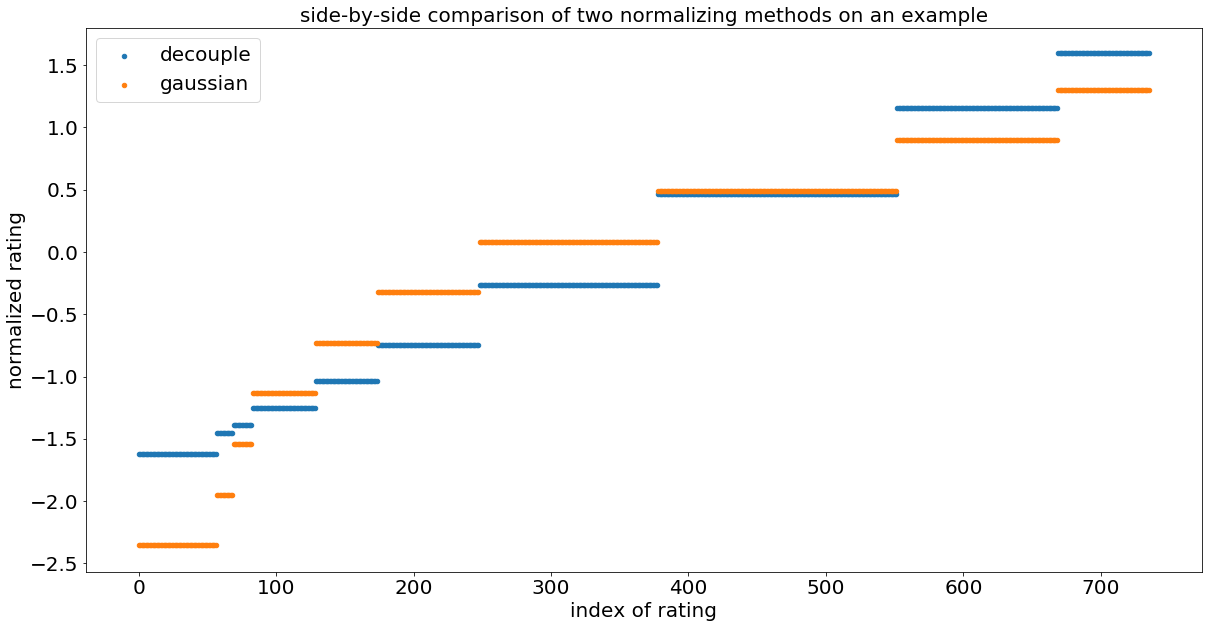

In [82]:
indexRater = 3
rater = allRaters[indexRater]
decouple = getGaussianNormalizedRatings(np.sort(decoupledRatingPerrater[rater]))
gaussian = np.sort(gaussianRatingPerRater[rater])

fig = plt.figure(figsize = (20, 10))
plt.scatter(range(len(decouple)), decouple, s = 20, label = "decouple")
plt.scatter(range(len(gaussian)), gaussian, s = 20, label = "gaussian")
plt.legend(fontsize = 20)
plt.ylabel("normalized rating", fontsize = 20)
plt.xlabel("index of rating", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("side-by-side comparison of two normalizing methods on an example", fontsize = 20)

In [53]:
meanDecoupledRatingPerRater = [np.mean(decoupledRatingPerrater[rater]) for rater in allRaters]

In [83]:
print("mean of mean decoupled rating per rater: %.2f" % (np.mean(meanDecoupledRatingPerRater)))
print("median of mean decoupled rating per rater: %.2f" % (np.median(meanDecoupledRatingPerRater)))

mean of mean decoupled rating per rater: 0.50
median of mean decoupled rating per rater: 0.50


## Observation on two normalizing method for our specific case (0.5 ~ 5 movie ratings)

Decoupling method differentiates ratings more at positive ratings\
Gaussian method differentiates ratings more at negative ratings
### Based on overall distribution of ratings (majority of ratings reside in higher range[3, 5]), decoupling method should serve better at differentiating users' ratings.

## Two papers comparing their performances

This paper\
"A Study of Methods for Normalizing User Ratings in Collaborative Filtering"\
https://www.cs.purdue.edu/homes/lsi/sigir04-cf-norm.pdf \
compares these two normalization methods for single-criteria collaborative filtering on a small dataset

This paper\
"IMPROVING ACCURACY OF MULTI-CRITERIA COLLABORATIVE FILTERING BY NORMALIZING USER RATINGS"\
https://pdfs.semanticscholar.org/0a38/aa813f16540ba2eaa3eda3a08f7c3814e079.pdf \
compares these two normalization methods for multi-criteria collaborative filtering on a larger dataset
 
Both concludes that Decoupling Normalization yields better results.

# Normalize the ratings dataset

In [84]:
otherInfosPerRater = {rater: [] for rater in allRaters}
for i in range(len(df_rating)):
    row = df_rating.iloc[i]
    otherInfosPerRater[row['userId']].append((row['movieId'], row['timestamp']))

In [90]:
ratingDatasetFile = 'rating_full_dataset_normalized.csv'
with open(data_directory + ratingDatasetFile, 'w', newline='') as out_csv:
    writer = csv.writer(out_csv, delimiter=',')
    writer.writerow(['rater_id', 'movie_id', 'rating', 'timestamp'])


In [91]:
%%time
total = len(allRaters)
count = 0
with open(data_directory + ratingDatasetFile, 'a', newline='') as out_csv:
    writer = csv.writer(out_csv, delimiter=',')
    for rater in allRaters:
        if len(otherInfosPerRater[rater]) != len(decoupledRatingPerrater[rater]):
            print(f"error! rater: {rater} len_info {len(otherInfosPerRater[rater])} len_decoupled {len(decoupledRatingPerrater[rater])}")

        for i in range(len(otherInfosPerRater[rater])):
            rating = decoupledRatingPerrater[rater][i]
            movieId = otherInfosPerRater[rater][i][0]
            timestamp = otherInfosPerRater[rater][i][1]
            writer.writerow([rater, movieId, rating - 0.5, timestamp])
    
        count += 1
        if count % 100 == 0:
            print(f'processed {count} raters, {total - count} left')

processed 100 raters, 283128 left
processed 200 raters, 283028 left
processed 300 raters, 282928 left
processed 400 raters, 282828 left
processed 500 raters, 282728 left
processed 600 raters, 282628 left
processed 700 raters, 282528 left
processed 800 raters, 282428 left
processed 900 raters, 282328 left
processed 1000 raters, 282228 left
processed 1100 raters, 282128 left
processed 1200 raters, 282028 left
processed 1300 raters, 281928 left
processed 1400 raters, 281828 left
processed 1500 raters, 281728 left
processed 1600 raters, 281628 left
processed 1700 raters, 281528 left
processed 1800 raters, 281428 left
processed 1900 raters, 281328 left
processed 2000 raters, 281228 left
processed 2100 raters, 281128 left
processed 2200 raters, 281028 left
processed 2300 raters, 280928 left
processed 2400 raters, 280828 left
processed 2500 raters, 280728 left
processed 2600 raters, 280628 left
processed 2700 raters, 280528 left
processed 2800 raters, 280428 left
processed 2900 raters, 280328

processed 23800 raters, 259428 left
processed 23900 raters, 259328 left
processed 24000 raters, 259228 left
processed 24100 raters, 259128 left
processed 24200 raters, 259028 left
processed 24300 raters, 258928 left
processed 24400 raters, 258828 left
processed 24500 raters, 258728 left
processed 24600 raters, 258628 left
processed 24700 raters, 258528 left
processed 24800 raters, 258428 left
processed 24900 raters, 258328 left
processed 25000 raters, 258228 left
processed 25100 raters, 258128 left
processed 25200 raters, 258028 left
processed 25300 raters, 257928 left
processed 25400 raters, 257828 left
processed 25500 raters, 257728 left
processed 25600 raters, 257628 left
processed 25700 raters, 257528 left
processed 25800 raters, 257428 left
processed 25900 raters, 257328 left
processed 26000 raters, 257228 left
processed 26100 raters, 257128 left
processed 26200 raters, 257028 left
processed 26300 raters, 256928 left
processed 26400 raters, 256828 left
processed 26500 raters, 2567

processed 46800 raters, 236428 left
processed 46900 raters, 236328 left
processed 47000 raters, 236228 left
processed 47100 raters, 236128 left
processed 47200 raters, 236028 left
processed 47300 raters, 235928 left
processed 47400 raters, 235828 left
processed 47500 raters, 235728 left
processed 47600 raters, 235628 left
processed 47700 raters, 235528 left
processed 47800 raters, 235428 left
processed 47900 raters, 235328 left
processed 48000 raters, 235228 left
processed 48100 raters, 235128 left
processed 48200 raters, 235028 left
processed 48300 raters, 234928 left
processed 48400 raters, 234828 left
processed 48500 raters, 234728 left
processed 48600 raters, 234628 left
processed 48700 raters, 234528 left
processed 48800 raters, 234428 left
processed 48900 raters, 234328 left
processed 49000 raters, 234228 left
processed 49100 raters, 234128 left
processed 49200 raters, 234028 left
processed 49300 raters, 233928 left
processed 49400 raters, 233828 left
processed 49500 raters, 2337

processed 69800 raters, 213428 left
processed 69900 raters, 213328 left
processed 70000 raters, 213228 left
processed 70100 raters, 213128 left
processed 70200 raters, 213028 left
processed 70300 raters, 212928 left
processed 70400 raters, 212828 left
processed 70500 raters, 212728 left
processed 70600 raters, 212628 left
processed 70700 raters, 212528 left
processed 70800 raters, 212428 left
processed 70900 raters, 212328 left
processed 71000 raters, 212228 left
processed 71100 raters, 212128 left
processed 71200 raters, 212028 left
processed 71300 raters, 211928 left
processed 71400 raters, 211828 left
processed 71500 raters, 211728 left
processed 71600 raters, 211628 left
processed 71700 raters, 211528 left
processed 71800 raters, 211428 left
processed 71900 raters, 211328 left
processed 72000 raters, 211228 left
processed 72100 raters, 211128 left
processed 72200 raters, 211028 left
processed 72300 raters, 210928 left
processed 72400 raters, 210828 left
processed 72500 raters, 2107

processed 92800 raters, 190428 left
processed 92900 raters, 190328 left
processed 93000 raters, 190228 left
processed 93100 raters, 190128 left
processed 93200 raters, 190028 left
processed 93300 raters, 189928 left
processed 93400 raters, 189828 left
processed 93500 raters, 189728 left
processed 93600 raters, 189628 left
processed 93700 raters, 189528 left
processed 93800 raters, 189428 left
processed 93900 raters, 189328 left
processed 94000 raters, 189228 left
processed 94100 raters, 189128 left
processed 94200 raters, 189028 left
processed 94300 raters, 188928 left
processed 94400 raters, 188828 left
processed 94500 raters, 188728 left
processed 94600 raters, 188628 left
processed 94700 raters, 188528 left
processed 94800 raters, 188428 left
processed 94900 raters, 188328 left
processed 95000 raters, 188228 left
processed 95100 raters, 188128 left
processed 95200 raters, 188028 left
processed 95300 raters, 187928 left
processed 95400 raters, 187828 left
processed 95500 raters, 1877

processed 115600 raters, 167628 left
processed 115700 raters, 167528 left
processed 115800 raters, 167428 left
processed 115900 raters, 167328 left
processed 116000 raters, 167228 left
processed 116100 raters, 167128 left
processed 116200 raters, 167028 left
processed 116300 raters, 166928 left
processed 116400 raters, 166828 left
processed 116500 raters, 166728 left
processed 116600 raters, 166628 left
processed 116700 raters, 166528 left
processed 116800 raters, 166428 left
processed 116900 raters, 166328 left
processed 117000 raters, 166228 left
processed 117100 raters, 166128 left
processed 117200 raters, 166028 left
processed 117300 raters, 165928 left
processed 117400 raters, 165828 left
processed 117500 raters, 165728 left
processed 117600 raters, 165628 left
processed 117700 raters, 165528 left
processed 117800 raters, 165428 left
processed 117900 raters, 165328 left
processed 118000 raters, 165228 left
processed 118100 raters, 165128 left
processed 118200 raters, 165028 left
p

processed 137800 raters, 145428 left
processed 137900 raters, 145328 left
processed 138000 raters, 145228 left
processed 138100 raters, 145128 left
processed 138200 raters, 145028 left
processed 138300 raters, 144928 left
processed 138400 raters, 144828 left
processed 138500 raters, 144728 left
processed 138600 raters, 144628 left
processed 138700 raters, 144528 left
processed 138800 raters, 144428 left
processed 138900 raters, 144328 left
processed 139000 raters, 144228 left
processed 139100 raters, 144128 left
processed 139200 raters, 144028 left
processed 139300 raters, 143928 left
processed 139400 raters, 143828 left
processed 139500 raters, 143728 left
processed 139600 raters, 143628 left
processed 139700 raters, 143528 left
processed 139800 raters, 143428 left
processed 139900 raters, 143328 left
processed 140000 raters, 143228 left
processed 140100 raters, 143128 left
processed 140200 raters, 143028 left
processed 140300 raters, 142928 left
processed 140400 raters, 142828 left
p

processed 160300 raters, 122928 left
processed 160400 raters, 122828 left
processed 160500 raters, 122728 left
processed 160600 raters, 122628 left
processed 160700 raters, 122528 left
processed 160800 raters, 122428 left
processed 160900 raters, 122328 left
processed 161000 raters, 122228 left
processed 161100 raters, 122128 left
processed 161200 raters, 122028 left
processed 161300 raters, 121928 left
processed 161400 raters, 121828 left
processed 161500 raters, 121728 left
processed 161600 raters, 121628 left
processed 161700 raters, 121528 left
processed 161800 raters, 121428 left
processed 161900 raters, 121328 left
processed 162000 raters, 121228 left
processed 162100 raters, 121128 left
processed 162200 raters, 121028 left
processed 162300 raters, 120928 left
processed 162400 raters, 120828 left
processed 162500 raters, 120728 left
processed 162600 raters, 120628 left
processed 162700 raters, 120528 left
processed 162800 raters, 120428 left
processed 162900 raters, 120328 left
p

processed 182500 raters, 100728 left
processed 182600 raters, 100628 left
processed 182700 raters, 100528 left
processed 182800 raters, 100428 left
processed 182900 raters, 100328 left
processed 183000 raters, 100228 left
processed 183100 raters, 100128 left
processed 183200 raters, 100028 left
processed 183300 raters, 99928 left
processed 183400 raters, 99828 left
processed 183500 raters, 99728 left
processed 183600 raters, 99628 left
processed 183700 raters, 99528 left
processed 183800 raters, 99428 left
processed 183900 raters, 99328 left
processed 184000 raters, 99228 left
processed 184100 raters, 99128 left
processed 184200 raters, 99028 left
processed 184300 raters, 98928 left
processed 184400 raters, 98828 left
processed 184500 raters, 98728 left
processed 184600 raters, 98628 left
processed 184700 raters, 98528 left
processed 184800 raters, 98428 left
processed 184900 raters, 98328 left
processed 185000 raters, 98228 left
processed 185100 raters, 98128 left
processed 185200 rat

processed 205400 raters, 77828 left
processed 205500 raters, 77728 left
processed 205600 raters, 77628 left
processed 205700 raters, 77528 left
processed 205800 raters, 77428 left
processed 205900 raters, 77328 left
processed 206000 raters, 77228 left
processed 206100 raters, 77128 left
processed 206200 raters, 77028 left
processed 206300 raters, 76928 left
processed 206400 raters, 76828 left
processed 206500 raters, 76728 left
processed 206600 raters, 76628 left
processed 206700 raters, 76528 left
processed 206800 raters, 76428 left
processed 206900 raters, 76328 left
processed 207000 raters, 76228 left
processed 207100 raters, 76128 left
processed 207200 raters, 76028 left
processed 207300 raters, 75928 left
processed 207400 raters, 75828 left
processed 207500 raters, 75728 left
processed 207600 raters, 75628 left
processed 207700 raters, 75528 left
processed 207800 raters, 75428 left
processed 207900 raters, 75328 left
processed 208000 raters, 75228 left
processed 208100 raters, 751

processed 228600 raters, 54628 left
processed 228700 raters, 54528 left
processed 228800 raters, 54428 left
processed 228900 raters, 54328 left
processed 229000 raters, 54228 left
processed 229100 raters, 54128 left
processed 229200 raters, 54028 left
processed 229300 raters, 53928 left
processed 229400 raters, 53828 left
processed 229500 raters, 53728 left
processed 229600 raters, 53628 left
processed 229700 raters, 53528 left
processed 229800 raters, 53428 left
processed 229900 raters, 53328 left
processed 230000 raters, 53228 left
processed 230100 raters, 53128 left
processed 230200 raters, 53028 left
processed 230300 raters, 52928 left
processed 230400 raters, 52828 left
processed 230500 raters, 52728 left
processed 230600 raters, 52628 left
processed 230700 raters, 52528 left
processed 230800 raters, 52428 left
processed 230900 raters, 52328 left
processed 231000 raters, 52228 left
processed 231100 raters, 52128 left
processed 231200 raters, 52028 left
processed 231300 raters, 519

processed 251700 raters, 31528 left
processed 251800 raters, 31428 left
processed 251900 raters, 31328 left
processed 252000 raters, 31228 left
processed 252100 raters, 31128 left
processed 252200 raters, 31028 left
processed 252300 raters, 30928 left
processed 252400 raters, 30828 left
processed 252500 raters, 30728 left
processed 252600 raters, 30628 left
processed 252700 raters, 30528 left
processed 252800 raters, 30428 left
processed 252900 raters, 30328 left
processed 253000 raters, 30228 left
processed 253100 raters, 30128 left
processed 253200 raters, 30028 left
processed 253300 raters, 29928 left
processed 253400 raters, 29828 left
processed 253500 raters, 29728 left
processed 253600 raters, 29628 left
processed 253700 raters, 29528 left
processed 253800 raters, 29428 left
processed 253900 raters, 29328 left
processed 254000 raters, 29228 left
processed 254100 raters, 29128 left
processed 254200 raters, 29028 left
processed 254300 raters, 28928 left
processed 254400 raters, 288

processed 274600 raters, 8628 left
processed 274700 raters, 8528 left
processed 274800 raters, 8428 left
processed 274900 raters, 8328 left
processed 275000 raters, 8228 left
processed 275100 raters, 8128 left
processed 275200 raters, 8028 left
processed 275300 raters, 7928 left
processed 275400 raters, 7828 left
processed 275500 raters, 7728 left
processed 275600 raters, 7628 left
processed 275700 raters, 7528 left
processed 275800 raters, 7428 left
processed 275900 raters, 7328 left
processed 276000 raters, 7228 left
processed 276100 raters, 7128 left
processed 276200 raters, 7028 left
processed 276300 raters, 6928 left
processed 276400 raters, 6828 left
processed 276500 raters, 6728 left
processed 276600 raters, 6628 left
processed 276700 raters, 6528 left
processed 276800 raters, 6428 left
processed 276900 raters, 6328 left
processed 277000 raters, 6228 left
processed 277100 raters, 6128 left
processed 277200 raters, 6028 left
processed 277300 raters, 5928 left
processed 277400 rat